In [1]:
%reload_ext autoreload
%autoreload 2
sys.path.insert(0, '../../src/')
import pandas as pd
import sys
import data_loader
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from pytablewriter import MediaWikiTableWriter
import plotly.express as px

In [2]:
player_data = data_loader.load_player_data(seasons=["2018-19"])

Loaded PBP-data
Loaded player-info data


In [33]:
player_data["ppg"] = player_data["points"] / player_data["games_played"]
player_data["2PT_percent"] = (player_data["fg_made"]-player_data["3PT_made"]) / (player_data["fg_made"] + player_data["fg_missed"] - (player_data["3PT_made"] + player_data["3PT_missed"]))
player_data["fg_percent"] = player_data["fg_made"] / (player_data["fg_made"] + player_data["fg_missed"])
player_data["3PT_percent"] = player_data["3PT_made"] / (player_data["3PT_made"] + player_data["3PT_missed"])
player_data["ft_percent"] = player_data["ft_made"] / (player_data["ft_made"] + player_data["ft_missed"])
player_data["apg"] = player_data["assists"] / player_data["games_played"]
player_data["rpg"] = player_data["rebounds"] / player_data["games_played"]

In [21]:
player_data

,season_name,player_name,Age,Height,Weight,College,Country,Draft Year,Draft Number,Draft Number,games_played,fg_made,fg_missed,3PT_made,3PT_missed,ft_made,ft_missed,points,rebounds,assists,turnover,fouls,ppg,2PT_percent,3PT_percent,ft_percent
920,2000-01,A.C. Green,37,6-9,225,Oregon State,USA,1985,23,23,82,144,180,0,6,79,32,367,313,39,45,120,4.475610,0.452830,0.000000,0.711712
2062,2000-01,A.J. Guyton,23,6-1,180,Indiana,USA,2000,32,32,33,78,114,27,42,15,3,198,36,64,24,35,6.000000,0.414634,0.391304,0.833333
2062,2001-02,A.J. Guyton,24,6-1,180,Indiana,USA,2000,32,32,45,88,156,46,77,22,5,244,44,81,37,24,5.422222,0.347107,0.373984,0.814815
2062,2002-03,A.J. Guyton,25,6-1,180,Indiana,USA,2000,32,32,2,0,4,0,1,0,0,0,0,2,1,0,0.000000,0.000000,0.000000,NaN
201985,2009-10,A.J. Price,23,6-2,181,Connecticut,USA,2009,52,52,56,145,209,60,114,60,15,410,88,106,59,54,7.321429,0.472222,0.344828,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,2006-07,Zydrunas Ilgauskas,32,7-3,260,None,Lithuania,1996,20,20,78,385,408,0,1,155,37,925,599,123,141,274,11.858974,0.486111,0.000000,0.807292
980,2007-08,Zydrunas Ilgauskas,33,7-3,260,None,Lithuania,1996,20,20,73,417,462,0,1,195,48,1029,682,104,135,256,14.095890,0.474943,0.000000,0.802469
980,2008-09,Zydrunas Ilgauskas,34,7-3,260,None,Lithuania,1996,20,20,65,342,382,15,24,139,35,838,490,64,90,192,12.892308,0.477372,0.384615,0.798851
980,2009-10,Zydrunas Ilgauskas,35,7-3,260,None,Lithuania,1996,20,20,64,194,244,11,12,75,26,474,345,48,63,193,7.406250,0.440964,0.478261,0.742574


In [69]:
game_data = data_loader.load_game_data(seasons=["2015-16"])

Loaded PBP-data


In [66]:
wins_dict = {team: 0 for team in set(game_data["visitor_team_id"].to_list() + game_data["home_team_id"].to_list())}
losses_dict = wins_dict.copy()

In [164]:
pbp_data = data_loader.load_data(seasons=["2000-01"])

<AxesSubplot:xlabel='visitor_shot_distance'>

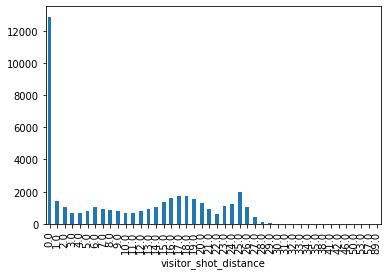

In [165]:
pbp_data[(pbp_data["EVENTMSGTYPE"].isin(["FIELD_GOAL_MADE"]))].groupby('visitor_shot_distance').size().plot.bar()

In [167]:
game_data = data_loader.load_game_data(seasons=None)

Loaded PBP-data


In [183]:
game_data.loc[game_data["home_win"] ,"prior_home_record_wins"] = game_data["home_record_wins"] - 1
game_data.loc[game_data["home_win"] ,"prior_home_record_losses"] = game_data["home_record_losses"]
game_data.loc[game_data["home_win"] ,"prior_visitor_record_losses"] = game_data["visitor_record_losses"] - 1
game_data.loc[game_data["home_win"] ,"prior_visitor_record_wins"] = game_data["visitor_record_wins"]
game_data.loc[game_data["home_win"]==False,"prior_home_record_losses"] = game_data["home_record_losses"] - 1
game_data.loc[game_data["home_win"]==False,"prior_home_record_wins"] = game_data["home_record_wins"]
game_data.loc[game_data["home_win"]==False ,"prior_visitor_record_wins"] = game_data["visitor_record_wins"] - 1
game_data.loc[game_data["home_win"]==False,"prior_visitor_record_losses"] = game_data["visitor_record_losses"]

In [186]:
game_data["better_record"] = game_data.apply(lambda x: "HOME" if (x["prior_home_record_wins"]-x["prior_home_record_losses"] > x["prior_visitor_record_wins"]-x["prior_visitor_record_losses"]) else ("VISITOR" if (x["prior_home_record_wins"]-x["prior_home_record_losses"] < x["prior_visitor_record_wins"]-x["prior_visitor_record_losses"]) else "EVEN"), axis=1)

array([<AxesSubplot:ylabel='EVEN'>, <AxesSubplot:ylabel='HOME'>,
       <AxesSubplot:ylabel='VISITOR'>], dtype=object)

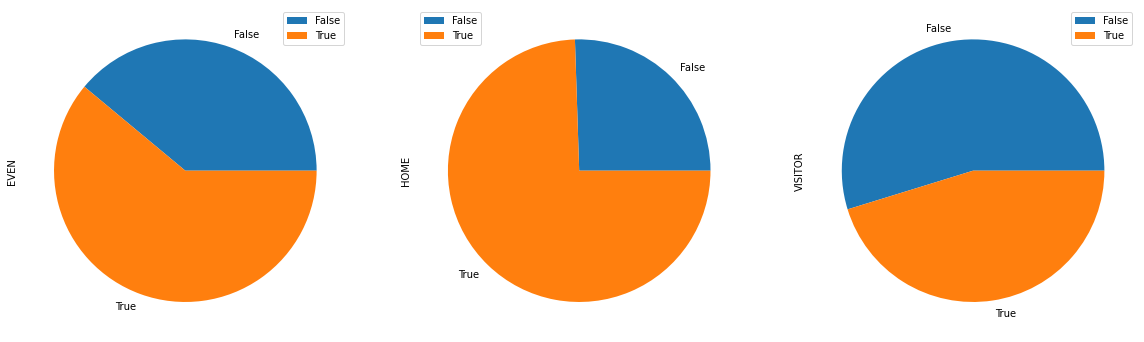

In [203]:
game_data.groupby(["home_win","better_record"]).size().unstack().plot.pie(subplots=True, figsize=(20,20))

In [228]:
px.pie(values=game_data[["home_win","better_record"]].value_counts(), labels=game_data[["home_win","better_record"]].unique() ,width=1000, height=1000)

AttributeError: 'DataFrame' object has no attribute 'unique'

In [232]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [231]:
game_data.groupby(["home_win","better_record"]).size().unstack()

better_record,EVEN,HOME,VISITOR
home_win,,,
False,418,2742,6104
True,655,8003,5043


In [300]:
labels = ["Home team wins","Visitor team wins"]
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[8003, 2742], name="HOME"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[655, 418], name="EVEN"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=[5043, 6104], name="VISITOR"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=20)

fig.update_layout(
    title_text="Wins by season record prior to game:",
    # Add annotations in the center of the donut pies.
    width=1500,
    height=500,
    annotations=[dict(text="Home team has <br> better record", x=0.097, y=0.5, font_size=14, showarrow=False),
                 dict(text="Teams have <br> even record", x=0.5, y=0.5, font_size=14, showarrow=False),
                 dict(text='Visitor team has <br> better record', x=0.908, y=0.5, font_size=14, showarrow=False)])
fig.show()

In [403]:
records = {}
for s_name, season in game_data.groupby("season_name"):
    season_records = {team_id: {"nickname": season[season["home_team_id"]==team_id].iloc[0]["home_team_nickname"],"record": "", "court": ""} for team_id in set(season["home_team_id"])}
    for _, game in season.iterrows():
        season_records[game["home_team_id"]]["record"] += "W" if game["home_win"] else "L"
        season_records[game["visitor_team_id"]]["record"] += "L" if game["home_win"] else "W"
        season_records[game["home_team_id"]]["court"] += "H"
        season_records[game["visitor_team_id"]]["court"] += "V"
    records[s_name] = season_records

In [326]:
game_data[game_data["home_team_id"]=="1610612755.0"]

,play_count,season_name,visitor_team_id,visitor_team_city,visitor_team_nickname,visitor_record_wins,visitor_record_losses,visitor_final_score,home_final_score,home_win,home_team_id,home_team_city,home_team_nickname,home_record_wins,home_record_losses,periods,minutes_played,visitor_players_deployed,home_players_deployed,visitor_fg_made,visitor_fg_missed,visitor_3PT_made,visitor_3PT_missed,home_fg_made,home_fg_missed,home_3PT_made,home_3PT_missed,visitor_ft_made,visitor_ft_missed,home_ft_made,home_ft_missed,visitor_rebound,home_rebound,visitor_team_rebound,home_team_rebound,visitor_turnover,home_turnover,visitor_team_turnover,home_team_turnover,visitor_foul,home_foul,visitor_subs,home_subs,visitor_timeout,home_timeout,visitor_jump_balls_won,home_jump_balls_won,tip_off_winner,visitor_ejection,home_ejection,visitor_team_ejection,home_team_ejection,home_scoring_leader,home_scoring_leader_points,visitor_scoring_leader,visitor_scoring_leader_points,home_made_max_shot_distance,visitor_made_max_shot_distance,home_made_min_shot_distance,visitor_made_min_shot_distance,home_made_mean_shot_distance,visitor_made_mean_shot_distance,prior_home_record_wins,prior_visitor_record_losses,prior_home_record_losses,prior_visitor_record_wins,better_record
GAME_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000015,469,2000-01,1610612761.0,Toronto,Raptors,0,2,98,104,True,1610612755.0,Philadelphia,76ers,2,0,4,48.0,9,10,39,47,5,8,41,44,3,8,15,3,19,9,40,43,7,4,16,14,0,0,26,24,16,28,8,2,1,1,HOME_PLAYER,0,0,0,0,947,24.0,1713,25.0,25.0,28.0,0.0,0.0,5.756098,10.128205,1.0,1.0,0.0,0.0,HOME
20000062,479,2000-01,1610612765.0,Detroit,Pistons,1,4,94,103,True,1610612755.0,Philadelphia,76ers,5,0,4,48.0,12,8,37,52,3,7,35,40,5,8,17,3,28,4,45,37,6,5,21,18,1,1,32,22,20,25,6,5,2,0,VISITOR_PLAYER,0,0,0,0,947,28.0,711,36.0,26.0,26.0,0.0,0.0,9.514286,8.594595,4.0,3.0,0.0,1.0,HOME
20000088,504,2000-01,1610612738.0,Boston,Celtics,2,4,83,85,True,1610612755.0,Philadelphia,76ers,7,0,4,48.0,11,9,31,50,5,12,28,50,1,11,16,11,28,9,43,50,8,9,15,16,1,2,34,23,23,21,6,6,1,3,HOME_PLAYER,0,0,0,0,727,25.0,1718,26.0,24.0,26.0,0.0,0.0,7.714286,8.806452,6.0,3.0,0.0,2.0,HOME
20000113,461,2000-01,1610612739.0,Cleveland,Cavaliers,6,2,98,107,True,1610612755.0,Philadelphia,76ers,8,0,4,48.0,10,12,40,35,2,6,40,39,3,7,16,7,24,9,38,31,6,7,21,14,1,0,31,24,23,24,6,3,0,2,HOME_PLAYER,0,0,0,0,248,23.0,221,24.0,26.0,29.0,0.0,0.0,6.450000,7.050000,7.0,1.0,0.0,6.0,HOME
20000127,399,2000-01,1610612748.0,Miami,Heat,4,5,73,94,True,1610612755.0,Philadelphia,76ers,9,0,4,48.0,10,12,29,48,4,9,38,35,3,4,11,5,15,2,38,35,2,12,13,15,1,2,19,19,11,22,5,5,0,1,HOME_PLAYER,0,0,0,0,947,19.0,258,16.0,46.0,26.0,0.0,0.0,7.894737,11.275862,8.0,4.0,0.0,4.0,HOME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21801027,469,2018-19,1610612758.0,Sacramento,Kings,33,35,114,123,True,1610612755.0,Philadelphia,76ers,44,25,4,48.0,10,9,43,51,9,18,46,45,7,17,19,5,24,3,40,49,8,3,8,10,1,1,22,18,21,29,5,5,0,1,HOME_PLAYER,0,0,0,0,202710,22.0,1628368,16.0,26.0,26.0,0.0,1.0,8.804348,10.255814,43.0,34.0,25.0,33.0,HOME
21801067,498,2018-19,1610612738.0,Boston,Celtics,43,29,115,118,True,1610612755.0,Philadelphia,76ers,47,25,4,48.0,10,9,45,51,12,20,34,56,11,22,13,3,39,4,46,54,4,5,8,8,1,1,25,18,23,26,7,5,1,1,VISITOR_PLAYER,1,0,0,0,203954,37.0,202681,36.0,28.0,27.0,1.0,0.0,11.705882,11.422222,46.0,28.0,25.0,43.0,HOME
21801123,503,2018-19,1610612751.0,Brooklyn,Nets,38,38,110,123,True,1610612755.0,Philadelphia,76ers,48,27,4,48.0,13,10,40,50,11,21,45,45,12,13,19,10,21,7,45,45,8,4,15,9,0,1,24,26,23,32,5,6,0,1,HOME_PLAYER,0,1,0,0,203954,39.0,203925,22.0,27.0,28.0,0.0,0.0,10.288889,10.200000,47.0,37.0,27.0,38.0,HOME


In [443]:
record_df = pd.DataFrame({f"{r} {t}":records[r][t] for r in records for t in records[r]}).transpose().reset_index()
record_df[["season_name","team_id"]] = record_df["index"].str.split(" ", expand=True)
record_df = record_df.drop("index", axis=1)
record_df = record_df[["season_name","team_id","nickname","record","court"]]
record_df["games"] = record_df["record"].str.len()
record_df["wins"] = record_df["record"].str.count("W")
record_df["losses"] = record_df["record"].str.count("L")
record_df["longest_win_streak"] = record_df["record"].apply(lambda x: max_repeat_of_char(x, "W"))
record_df["longest_loosing_streak"] = record_df["record"].apply(lambda x: max_repeat_of_char(x, "L"))
record_df["longest_home_win_streak"] = record_df.apply(lambda x: max_repeat_of_char_mask(x["record"], "W", x["court"], "H") ,axis=1)
record_df["longest_away_win_streak"] = record_df.apply(lambda x: max_repeat_of_char_mask(x["record"], "W", x["court"], "V") ,axis=1)
record_df["longest_home_loosing_streak"] = record_df.apply(lambda x: max_repeat_of_char_mask(x["record"], "L", x["court"], "H") ,axis=1)
record_df["longest_away_loosing_streak"] = record_df.apply(lambda x: max_repeat_of_char_mask(x["record"], "L", x["court"], "V") ,axis=1)
record_df["wins_after_win"] = record_df["record"].apply(lambda x: sum([1 for i, r in enumerate(x) if i>0 and x[i-1]=="W" and r=="W"]))
record_df["wins_after_loss"] = record_df["record"].apply(lambda x: sum([1 for i, r in enumerate(x) if i>0 and x[i-1]=="L" and r=="W"]))
record_df["loss_after_win"] = record_df["record"].apply(lambda x: sum([1 for i, r in enumerate(x) if i>0 and x[i-1]=="W" and r=="L"]))
record_df["loss_after_loss"] = record_df["record"].apply(lambda x: sum([1 for i, r in enumerate(x) if i>0 and x[i-1]=="L" and r=="L"]))

In [445]:
record_df

,season_name,team_id,nickname,record,court,games,wins,losses,longest_win_streak,longest_loosing_streak,longest_home_win_streak,longest_away_win_streak,longest_home_loosing_streak,longest_away_loosing_streak,wins_after_win,wins_after_loss,loss_after_win,loss_after_loss
0,2000-01,1610612746.0,Clippers,LLWLLWLLWWLLLLLWLLLWLLWLWLWWLLLWLLWLWLLLLLLLLL...,VHHVHHVHHVHHVHHHVVVVVVHHVHHHVVHHVHVHHVVVVHHHHV...,82,31,51,4,9,5,3,4,9,11,20,20,30
1,2000-01,1610612759.0,Spurs,WWWLWLWWWLWLWWLWLLWWLLWWWWLWLWWWWWLLLLWWWWWWWW...,HHVVHVHHVVHVHHVVVHHVVHHVHHVHVVHHVVVVHHHVVVHHHV...,82,58,24,9,4,8,5,2,3,40,17,18,6
2,2000-01,1610612743.0,Nuggets,LWLLWLWLWWWLWLWLWWLLLLLWWWWLWLWWWWWLWWWWLWLWLL...,VHHHHVHVHHVVHVVHHHVVVVHVVHHVHHHVHHVVHHHHVHVHHV...,82,40,42,5,5,9,2,2,9,16,24,23,18
3,2000-01,1610612738.0,Celtics,WWLLLLWWLLWWLWLLWLLWLLLLWWLLWLLLLLLWLWLWLWWWWW...,HHVVHVHHVHHHHVVHHVHHHHVHHVVVVHVHHVHHHVVVVHHHVV...,82,36,46,6,6,7,5,4,6,14,21,22,24
4,2000-01,1610612766.0,Hornets,WLWWWLLLLLWWWWWWLWLWWLWWWWWWWLLLLWLWLWLLLLLWLW...,VHHVVHVVVHVVHVHHVHVHHVHVHHVHHVVVVVVHHVVVHHVHHV...,82,46,36,7,5,12,4,3,4,29,16,16,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2018-19,1610612753.0,Magic,WLLWLLLLWWLWWLWWWLLWLLWWLLLWWLLLLWWLWLLLLWWLLL...,HHVVHVHHVHHHVVHHHHVVVVVVHHVHHHVHHHHVVVVVVHHVHH...,82,42,40,6,4,9,4,4,5,22,19,19,21
562,2018-19,1610612740.0,Pelicans,WWWWLLLLLLWWWLWWWLLLLWLWLWLWLWLLLLLWLWLWWWLWLL...,VHHHHVVVVVHHVVHHHVVVHHVVHHHVVHHVVVVHHHVVHHVVVV...,82,33,49,4,6,5,3,8,6,12,20,21,28
563,2018-19,1610612757.0,Trail Blazers,WWLWLWWWLWWWWLLWWLLLWLLLWWLLWWWLWLWLWWLWWWWLLW...,HHHVVVVHHHHHHVVVVVVHHHVVHHVVHVHHHVVHHVHHHHHVVH...,82,53,29,6,3,8,4,1,6,32,20,20,9
564,2018-19,1610612745.0,Rockets,LWLLLLWWWLLWWWWWLLLLWWLLLWWWWWLWWWWWWLWLWLWLWL...,HVVHHHVVVVVHVHHHVVVHVHVVVHHVHHVHHHVHVVHHHVHHHV...,82,53,29,9,4,10,6,4,3,36,17,17,11


In [452]:
record_df[["wins_after_win","wins_after_loss","loss_after_win","loss_after_loss"]].sum()#/45364

wins_after_win     12304
wins_after_loss    10377
loss_after_win     10386
loss_after_loss    12297
dtype: int64

In [451]:
record_df["games"].sum()

45930

In [415]:
def max_repeat_of_char(s, ch):
    max = 0
    current = 0
    for c in s:
        if c==ch:
            current += 1
            max = current if current>max else max
        else:
            current = 0
    return max

In [426]:
def max_repeat_of_char_mask(s, ch, mask, masker):
    max = 0
    current = 0
    for c, m in zip(s, mask):
        if m!=masker:
            continue
        if c==ch:
            current += 1
            max = current if current>max else max
        else:
            current = 0
    return max